# Principal Component Analysis

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.
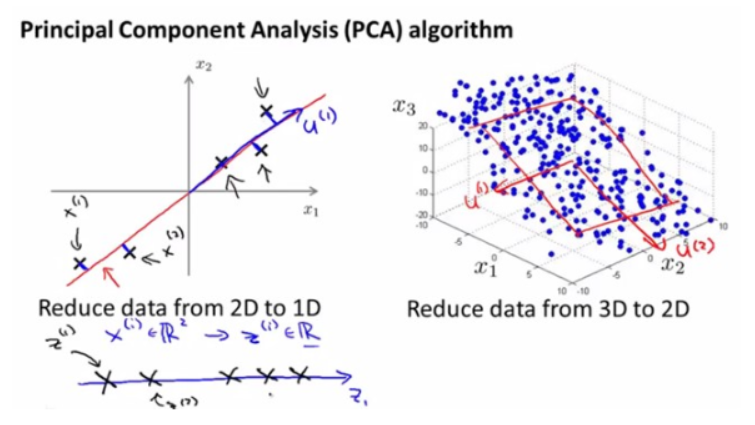
PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance. Each additional component expresses less variance and more noise, so representing the data with a smaller subset of principal components preserves the signal and discards the noise.

1. **PCA on 3D dataset** 


* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$ standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
$x_1$ is distributed as $N(0,1)$
$x_2$ is distributed as $x_1+N(0,3)$
$x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import pandas as pd
from sklearn.decomposition import PCA
import scipy as sc

In [9]:
N = 10000

x1 = np.random.normal(0, 1, (N))
x2 = x1 + np.random.normal(0, 3, (N))
x3 = 2*x1 + x2

X = np.array([x1, x2, x3])

In [10]:
# Covariance
l, V = np.linalg.eig(np.cov(X))
print("Covariance Matrix:", np.cov(X))
print("\nEigen values:", l)
print("\nEigen vectors:", V)

Covariance Matrix: [[ 0.984021    0.91876346  2.88680546]
 [ 0.91876346  9.7830395  11.62056642]
 [ 2.88680546 11.62056642 17.39417735]]

Eigen values: [ 2.61457873e+01 -6.97396962e-16  2.01545050e+00]

Eigen vectors: [[-0.1137464  -0.81649658  0.56603453]
 [-0.57950149 -0.40824829 -0.70534485]
 [-0.80699429  0.40824829  0.42672421]]


In [11]:
# Svd
U, spectrum, Vt = la.svd(X)
l_svd = spectrum ** 2 / 9999
V_svd = U
print("Eigen values:", spectrum)
print("\nEigen vectors:", V_svd)

Eigen values: [5.11335027e+02 1.41959580e+02 5.18163352e-14]

Eigen vectors: [[-0.11374879  0.56603405 -0.81649658]
 [-0.57949851 -0.7053473  -0.40824829]
 [-0.80699609  0.4267208   0.40824829]]


In [12]:
# Check the two procedures
Xp = np.dot(V_svd.T, X)
Xreducted = Xp[:2]
Vreducted = V_svd[:,:2]
Xpp = np.dot(Vreducted, Xreducted)
np.allclose(X,Xpp)

True

In [13]:
lamb = 0
for i in range(len(l_svd)):
    lamb += l_svd[i]
    print("\nthe percent of the total variablity with {} eigenvalues is: {}".format(i+1,lamb/l_svd.sum()))


the percent of the total variablity with 1 eigenvalues is: 0.9284397195789582

the percent of the total variablity with 2 eigenvalues is: 1.0

the percent of the total variablity with 3 eigenvalues is: 1.0


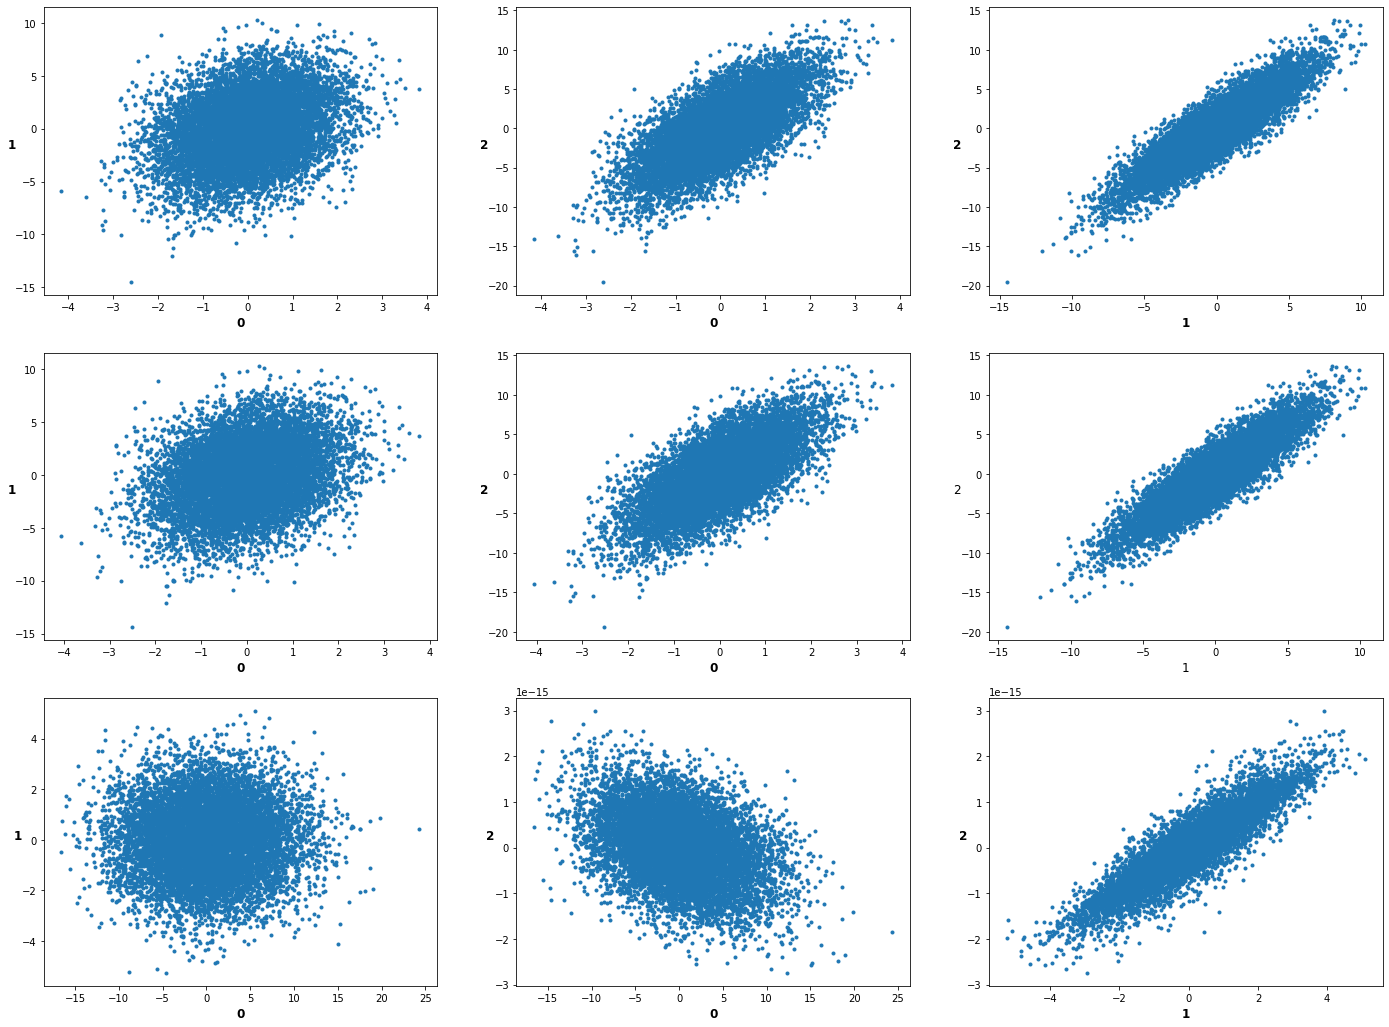

In [29]:
# In the first row there are the plots of the original points
# In the second there are the plots of the points in the new cordinates but in the originale space
# In the third there are the plots of the original points in the rotated space 
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(24, 18))
axes[1,1].scatter(Xpp[0],Xpp[2],marker='.')
axes[1,1].set_xlabel("0",fontweight='bold',fontsize='large')
axes[1,1].set_ylabel("2",fontweight='bold',fontsize='large').set_rotation("0")
axes[1,2].scatter(Xpp[1],Xpp[2],marker='.')
axes[1,2].set_xlabel("1",fontweight='normal',fontsize='large')
axes[1,2].set_ylabel("2",fontweight='normal',fontsize='large').set_rotation("0")
axes[2,0].scatter(Xp[0],Xp[1],marker='.')
axes[2,0].set_xlabel("0",fontweight='bold',fontsize='large')
axes[2,0].set_ylabel("1",fontweight='bold',fontsize='large').set_rotation("0")
axes[2,1].scatter(Xp[0],Xp[2],marker='.')
axes[2,1].set_xlabel("0",fontweight='bold',fontsize='large')
axes[2,1].set_ylabel("2",fontweight='bold',fontsize='large').set_rotation("0")
axes[2,2].scatter(Xp[1],Xp[2],marker='.')
axes[2,2].set_xlabel("1",fontweight='bold',fontsize='large')
axes[2,2].set_ylabel("2",fontweight='bold',fontsize='large').set_rotation("0")
axes[0,0].scatter(X[0],X[1],marker='.')
axes[0,0].set_ylabel("1",fontweight='bold',fontsize='large').set_rotation("0")
axes[0,0].set_xlabel("0",fontweight='bold',fontsize='large')
axes[0,1].scatter(X[0],X[2],marker='.')
axes[0,1].set_xlabel("0",fontweight='bold',fontsize='large')
axes[0,1].set_ylabel("2",fontweight='bold',fontsize='large').set_rotation("0")
axes[0,2].scatter(X[1],X[2],marker='.')
axes[0,2].set_xlabel("1",fontweight='bold',fontsize='large')
axes[0,2].set_ylabel("2",fontweight='bold',fontsize='large').set_rotation("0")
axes[1,0].scatter(Xpp[0],Xpp[1],marker='.')
axes[1,0].set_xlabel("0",fontweight='heavy',fontsize='large')
axes[1,0].set_ylabel("1",fontweight='heavy',fontsize='large').set_rotation("0")


2. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

* Repeat the PCA procedure and compare the results with what you obtained before

In [15]:
# Add random noise
eps = np.random.normal(0, 1/50, (N, 10))

Y = X + np.sum(eps, axis=1)

In [16]:
# Covariance
l, V = np.linalg.eig(np.cov(Y))
print("covariance matrix:", np.cov(Y))
print("\neigenvalues:", l)
print("\neigenvectors:", V)

# Svd
U, spectrum, Vt = la.svd(Y)
l_svd = spectrum ** 2 / 9999
V_svd = U
print("eigenvalues:", spectrum)
print("\neigenvectors:", V_svd)


covariance matrix: [[ 0.98920546  0.92026933  2.88951393]
 [ 0.92026933  9.78086677 11.6195963 ]
 [ 2.88951393 11.6195963  17.39440983]]

eigenvalues: [2.61450652e+01 2.65167859e-03 2.01676515e+00]

eigenvectors: [[-0.11389517 -0.81583117  0.56696331]
 [-0.57943839 -0.40901476 -0.70495254]
 [-0.80701862  0.40881099  0.42613909]]
eigenvalues: [511.32607195 142.00583161   5.15007587]

eigenvectors: [[-0.11389542  0.56696236 -0.81583179]
 [-0.57943523 -0.70495475 -0.40901543]
 [-0.80702085  0.4261367   0.40880908]]


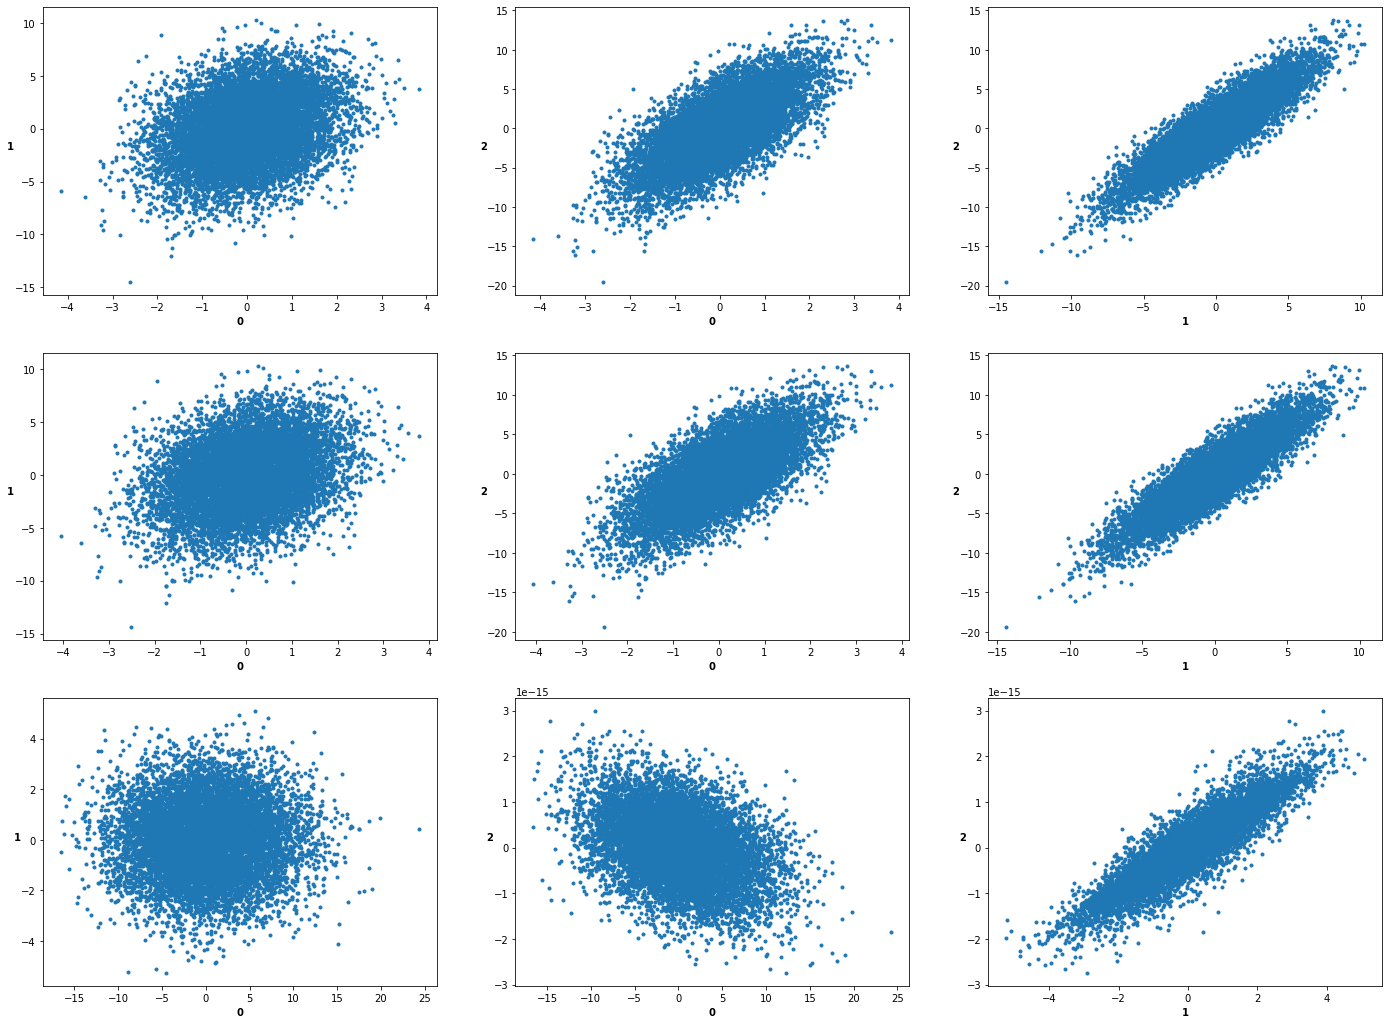

In [17]:
# In the first row there are the plots of the original points
# In the second there are the plots of the points in the new cordinates but in the originale space
# In the third there are the plots of the original points in the rotated space 
X = Y

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(24, 18))
axes[0,0].scatter(X[0],X[1],marker='.')
axes[0,0].set_ylabel("1",fontweight='bold').set_rotation("0")
axes[0,0].set_xlabel("0",fontweight='bold')
axes[0,1].scatter(X[0],X[2],marker='.')
axes[0,1].set_xlabel("0",fontweight='bold')
axes[0,1].set_ylabel("2",fontweight='bold').set_rotation("0")
axes[0,2].scatter(X[1],X[2],marker='.')
axes[0,2].set_xlabel("1",fontweight='bold')
axes[0,2].set_ylabel("2",fontweight='bold').set_rotation("0")
axes[1,0].scatter(Xpp[0],Xpp[1],marker='.')
axes[1,0].set_xlabel("0",fontweight='bold')
axes[1,0].set_ylabel("1",fontweight='bold').set_rotation("0")
axes[1,1].scatter(Xpp[0],Xpp[2],marker='.')
axes[1,1].set_xlabel("0",fontweight='bold')
axes[1,1].set_ylabel("2",fontweight='bold').set_rotation("0")
axes[1,2].scatter(Xpp[1],Xpp[2],marker='.')
axes[1,2].set_xlabel("1",fontweight='bold')
axes[1,2].set_ylabel("2",fontweight='bold').set_rotation("0")
axes[2,0].scatter(Xp[0],Xp[1],marker='.')
axes[2,0].set_xlabel("0",fontweight='bold')
axes[2,0].set_ylabel("1",fontweight='bold').set_rotation("0")
axes[2,1].scatter(Xp[0],Xp[2],marker='.')
axes[2,1].set_xlabel("0",fontweight='bold')
axes[2,1].set_ylabel("2",fontweight='bold').set_rotation("0")
axes[2,2].scatter(Xp[1],Xp[2],marker='.')
axes[2,2].set_xlabel("1",fontweight='bold')
axes[2,2].set_ylabel("2",fontweight='bold').set_rotation("0")